In [7]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split

# Path to the dataset folders
train_path = 'C:\\Preksha_SIES\\SEM 7 Project\\archive\\sign_data\\train'
test_path = 'C:\\Preksha_SIES\\SEM 7 Project\\archive\\sign_data\\test'

# Function to load images from a directory
def load_images_from_folder(folder):
    images = []
    labels = []
    for label_folder in os.listdir(folder):
        label = 0 if 'forg' in label_folder else 1  # 0 for forged, 1 for genuine
        img_folder = os.path.join(folder, label_folder)
        for img_filename in os.listdir(img_folder):
            img = cv2.imread(os.path.join(img_folder, img_filename), cv2.IMREAD_GRAYSCALE)
            if img is not None:
                img = cv2.resize(img, (128, 128))  # Resize all images to a standard size
                images.append(img)
                labels.append(label)
    return np.array(images), np.array(labels)

# Load training and testing data
X_train, y_train = load_images_from_folder(train_path)
X_test, y_test = load_images_from_folder(test_path)

# Normalize the data
X_train = X_train / 255.0
X_test = X_test / 255.0

# Reshape for CNN input (add the channel dimension)
X_train = X_train.reshape(X_train.shape[0], 128, 128, 1)
X_test = X_test.reshape(X_test.shape[0], 128, 128, 1)


In [9]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input

# Build the CNN model
model = Sequential()

# Add the Input layer
model.add(Input(shape=(128, 128, 1)))

# Add convolutional layers and pooling layers
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten the output from the convolutional layers
model.add(Flatten())

# Add dense layers with Dropout to avoid overfitting
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))  # Dropout layer to reduce overfitting
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))  # Dropout layer to reduce overfitting

# Output layer for binary classification (Genuine vs Forged)
model.add(Dense(1, activation='sigmoid'))  # Binary classification

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Model summary
model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 126, 126, 32)        │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 28, 28, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 128)                 │       3,211,392 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,312,385 (12.64 MB)

 Trainable params: 3,312,385 (12.64 MB)

 Non-trainable params: 0 (0.00 B)

In [10]:
# Split training data into train and validation sets
X_train_split, X_val, y_train_split, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Train the model
history = model.fit(X_train_split, y_train_split, epochs=20, batch_size=32, validation_data=(X_val, y_val))


Epoch 1/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 23s 419ms/step - accuracy: 0.5726 - loss: 0.7127 - val_accuracy: 0.5848 - val_loss: 0.6868
Epoch 2/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 17s 400ms/step - accuracy: 0.6949 - loss: 0.6454 - val_accuracy: 0.7303 - val_loss: 0.4750
Epoch 3/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 21s 399ms/step - accuracy: 0.8663 - loss: 0.4401 - val_accuracy: 0.9182 - val_loss: 0.2089
Epoch 4/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 17s 398ms/step - accuracy: 0.9010 - loss: 0.2741 - val_accuracy: 0.9333 - val_loss: 0.2008
Epoch 5/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 17s 400ms/step - accuracy: 0.9344 - loss: 0.1823 - val_accuracy: 0.9303 - val_loss: 0.1583
Epoch 6/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 17s 399ms/step - accuracy: 0.9428 - loss: 0.1991 - val_accuracy: 0.9515 - val_loss: 0.1516
Epoch 7/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 17s 399ms/step - accuracy: 0.9333 - loss: 0.1751 - val_accuracy: 0.9515 - val_loss: 0.1398
Epoch 8/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 17s 397ms/step - accuracy: 0.9554 - loss: 0.1225 - val_accu

In [11]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 121ms/step - accuracy: 0.9979 - loss: 0.0069
Test Accuracy: 99.80%


In [13]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)

datagen.fit(X_train_split)

history = model.fit(datagen.flow(X_train_split, y_train_split, batch_size=32),
                    epochs=20,
                    validation_data=(X_val, y_val))


Epoch 1/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 17s 394ms/step - accuracy: 0.9415 - loss: 0.1468 - val_accuracy: 0.9303 - val_loss: 0.1548
Epoch 2/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 17s 389ms/step - accuracy: 0.9541 - loss: 0.1296 - val_accuracy: 0.8667 - val_loss: 0.2695
Epoch 3/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 17s 389ms/step - accuracy: 0.9514 - loss: 0.1232 - val_accuracy: 0.9091 - val_loss: 0.2592
Epoch 4/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 17s 394ms/step - accuracy: 0.9514 - loss: 0.1184 - val_accuracy: 0.9182 - val_loss: 0.1586
Epoch 5/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 14s 331ms/step - accuracy: 0.9505 - loss: 0.1204 - val_accuracy: 0.7273 - val_loss: 0.5352
Epoch 6/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 13s 301ms/step - accuracy: 0.9502 - loss: 0.1161 - val_accuracy: 0.9394 - val_loss: 0.1421
Epoch 7/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 14s 312ms/step - accuracy: 0.9535 - loss: 0.1160 - val_accuracy: 0.8758 - val_loss: 0.2890
Epoch 8/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 13s 290ms/step - accuracy: 0.9560 - loss: 0.1103 - val_accu

In [15]:
model.save('signature_verification_model.keras')  # Native Keras format

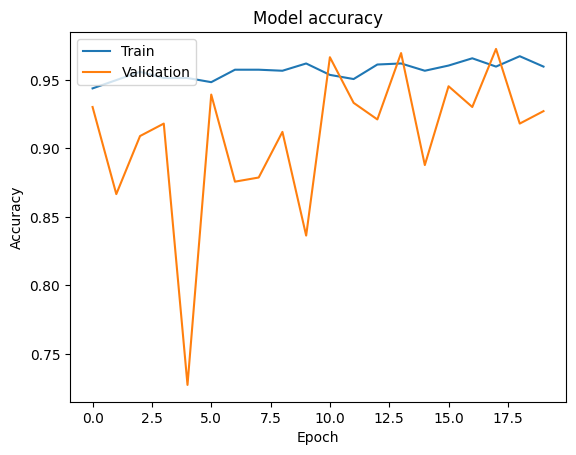

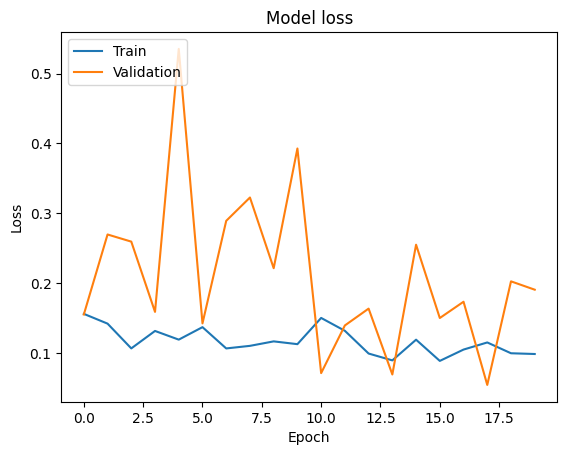

In [16]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [28]:
import numpy as np
import tensorflow as tf
from PIL import Image
import io
import cv2
from ipywidgets import FileUpload, Button, Output, VBox
from IPython.display import display, clear_output

# Load the pre-trained model
model = tf.keras.models.load_model('signature_verification_model.h5')

# Preprocess the uploaded image
def preprocess_image(image):
    image = image.convert('L')  # Convert to grayscale
    image = image.resize((128, 128))  # Resize to 128x128
    image_array = np.array(image) / 255.0  # Normalize pixel values
    image_array = image_array.reshape(1, 128, 128, 1)  # Reshape for the model
    return image_array

# Predict whether the signature is forged or genuine
def predict_signature(image):
    preprocessed_image = preprocess_image(image)
    prediction = model.predict(preprocessed_image)
    if prediction < 0.5:
        return "Forged"
    else:
        return "Genuine"

# File upload widget
file_upload = FileUpload(accept='.png, .jpg, .jpeg', multiple=False)

# Button for prediction
predict_button = Button(description="Predict")
output = Output()

def on_upload_change(change):
    clear_output(wait=True)
    display(file_upload)
    display(predict_button)
   
file_upload.observe(on_upload_change, names='value')

def on_button_clicked(b):
    with output:
        clear_output(wait=True)
        # Check if a file was uploaded
        if file_upload.value:
            # Print the structure of file_upload.value for debugging
            print("Uploaded file structure:", file_upload.value)
            
            # Extract the uploaded image
            if isinstance(file_upload.value, dict):
                uploaded_file = next(iter(file_upload.value.values()))  # Get the first (and only) uploaded file
            elif isinstance(file_upload.value, tuple):
                # If it is a tuple, we access the first element
                uploaded_file = file_upload.value[0]
            else:
                print("Unexpected file format.")
                return
            
            image = Image.open(io.BytesIO(uploaded_file['content']))
            
            # Predict the result
            result = predict_signature(image)
            print(f"Prediction: {result}")
        else:
            print("No file uploaded. Please upload a signature image.")


predict_button.on_click(on_button_clicked)

# Display the GUI
display(file_upload)
display(predict_button)
display(output)

FileUpload(value=(), accept='.png, .jpg, .jpeg', description='Upload')

Button(description='Predict', style=ButtonStyle())

Output()